# Assignment 1 - Inpainting

Name: Thomas Buchegger<br>
Matriculation number: 

In [10]:
from numpy import *
from PIL import Image
import matplotlib.pyplot as plt
from scipy import signal
from scipy import sparse

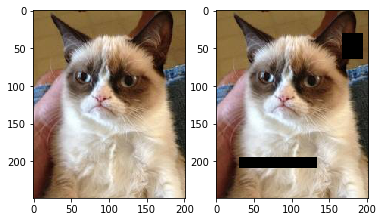

In [2]:
im = array(Image.open('grumpycat.jpeg')) / 256

# mask
h, w, _ = im.shape
omega = ones((h, w))
omega[195:209, 31:134] = 0
omega[31:65, 166:194] = 0

# create input image
omega3 = expand_dims(omega, 2)
g = im * omega3

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.imshow(g)

## (a) Gradient Descent

In [3]:
def GetD1(uc, gc, omega):
    result = ((uc-gc) * omega) * 2
    return result

In [4]:
def GetD2(uc, lmbda):


#    epsi = 1e-15 # small number to prevent complex nbr see lecture 3-4
    
#    filterX = [1, -1]
#    filterY = [1, -1]
    
#    dx = signal.convolve2d(uc[: [1:]], filterX, 'valid')
#    dy = signal.convolve2d(uc[[1 :] :], filterY, 'valid')
#    dxy = signal.convolve2d(uc[: [1 :]],-filterX, 'valid') + signal.convolve2d(A[[1:], :], -filterY, 'valid')
    
#    tv = sqrt(dx^2 + dy^2 + epsi)
    
#    a2 = zeroes(size(dy))
#    a3 = zeroes(size(dx))
    
#    for i = 2 in range(size(uc, 1) - 1):
#        for j = 2 in range(size(uc, 2) -1):
#            a2[i,j] = dy[i-1,j] / tv[i-1,j];
#            a3[i,j] = dx[i,j-1] / tv[i,j-1];
    
#    a1 = dxy/tv
    
#    result = (a1+a2+a3) * lmbda
   
 #   return result


     li, lj = uc.shape
    
     res = zeros((li, lj))
    
     epsi = 1e-15 # small number to prevent complex nbr see lecture 3-4

     xf1  = [[0 ,-1,0],
             [-1,4,-1],
             [0 ,-1,0]]
    
     res = signal.convolve2d(uc,xf1,'same')
    
     return res*2*lmbda 

#     li, lj = uc.shape
    
#     epsi = 1e-15
#     res = zeros((li, lj))
    
#     for i  in range(1 ,li-1):
#         for j in range(1,lj-1):                 
#             res[i,j] =(uc[i,j]-uc[i-1,j])/sqrt( (uc[i,j]-uc[i-1,j])**2+(uc[i-1,j+1]-uc[i-1,j])**2+epsi ) 
#             res[i,j]+=(uc[i,j]-uc[i,j-1] )/sqrt( (uc[i+1,j-1]-uc[i,j-1])**2+(uc[i,j]-uc[i,j-1])**2+epsi)
#             res[i,j]+=( 2*uc[i,j]-uc[i+1,j]-uc[i,j+1] )/sqrt( (uc[i+1,j]-uc[i,j])**2+(uc[i,j+1]-uc[i,j])**2+epsi) 
            
#     return res*2*lmbda 

In [5]:
def GD(g, omega, lmbda):
    """
    g: color image of size (M, N, 3)
    omega: mask of size (M, N)
    lmbda: regularization parameter

    :returns u: inpainted image of size (M, N, 3)
    """
    u = g
    EPS = 0.07
    
    # separete colors
    red = u[:, :, 0]
    green = u[:, :, 1]
    blue = u[:, :, 2]
    
    # initial guess
    uRed = red;
    uGreen = green;
    uBlue = blue;
    
    for i in range(1000):
        rD1 = GetD1(uRed, red, omega)
        gD1 = GetD1(uGreen, green, omega)
        bD1 = GetD1(uBlue, blue, omega)
        rD2 = GetD2(uRed, lmbda)
        gD2 = GetD2(uGreen, lmbda)
        bD2 = GetD2(uBlue, lmbda)
        rGrad = rD1 + rD2
        gGrad = gD1 + gD2
        bGrad = bD1 + bD2
        
        uRed = uRed - rGrad*EPS
        uGreen = uGreen - gGrad*EPS
        uBlue = uBlue - bGrad*EPS
    
    u[:, :, 0] = uRed
    u[:, :, 1] = uGreen
    u[:, :, 2] = uBlue
    
    return u

Text(0.5,1,'reconstructed')

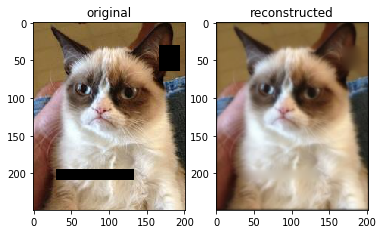

In [6]:
lmbda = 1  # change
uG = GD(g, omega, lmbda)

g = im * omega3

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(g)
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(uG)
plt.title('reconstructed')

## (b) Linearization + Gauss-Seidel

In [7]:
def SparseMatrix(u):
    m, n, *_ = u.shape
    
    rows = zeros((9, m * n))
    cols = zeros((9, m * n))
    vals = zeros((9, m * n))
    
    for i in range(n):
        for j in range(m):
            # center pixel (i, j)
            rows[0, i * m + j] = i * m + j
            cols[0, i * m + j] = i * m + j
            #vals[0, i * m + j] = 4 
            if u[j,i]==0:
                vals[0, i * m + j] = 4  # here change the value (could depend on 'u')
            else :
                vals[0, i * m + j] = 1
                
            # northern pixel (i, j - 1)
            rows[1, i * m + j] = i * m + j
            cols[1, i * m + j] = i * m + max(j - 1, 0)
            #vals[1, i * m + j] = -1  # here change the value (could depend on 'u')
            if u[j,i]==0:
                vals[1, i * m + j] = -1  # here change the value (could depend on 'u')
            else :
                vals[1, i * m + j] = 0
                
            # southern pixel (i, j + 1)
            rows[2, i * m + j] = i * m + j
            cols[2, i * m + j] = i * m + min(j + 1, m - 1)
            vals[2, i * m + j] = -1  # here change the value (could depend on 'u')
            if u[j,i]==0:
                vals[2, i * m + j] = -1  # here change the value (could depend on 'u')
            else :
                vals[2, i * m + j] = 0
            # western pixel  (i - 1, j)
            rows[3, i * m + j] = i * m + j
            cols[3, i * m + j] = max(i - 1, 0) * m + j
            vals[3, i * m + j] = -1  # here change the value (could depend on 'u')
            if u[j,i]==0:
                vals[3, i * m + j] = -1  # here change the value (could depend on 'u')
            else :
                vals[3, i * m + j] = 0
                
            # eastern pixel  (i + 1, j)
            rows[4, i * m + j] = i * m + j
            cols[4, i * m + j] = min(i + 1, n - 1) * m + j
            vals[4, i * m + j] = -1  # here change the value (could depend on 'u')
            if u[j,i]==0:
                vals[4, i * m + j] = -1  # here change the value (could depend on 'u')
            else :
                vals[4, i * m + j] = 0          
            # north-western pixel (i - 1, j - 1)
            rows[5, i * m + j] = i * m + j
            cols[5, i * m + j] = max(i - 1, 0) * m + max(j - 1, 0)
            vals[5, i * m + j] = 0  # here change the value (could depend on 'u')
            
            # north-eastern pixel (i + 1, j - 1)
            rows[6, i * m + j] = i * m + j
            cols[6, i * m + j] = min(i + 1, n - 1) * m + max(j - 1, 0)
            vals[6, i * m + j] = 0  # here change the value (could depend on 'u')
           
            # south-western pixel (i - 1, j + 1)
            rows[7, i * m + j] = i * m + j
            cols[7, i * m + j] = max(i - 1, 0) * m + min(j + 1, m - 1)
            vals[7, i * m + j] = 0  # here change the value (could depend on 'u')
            
            # south-eastern pixel  (i + 1, j + 1)
            rows[8, i * m + j] = i * m + j
            cols[8, i * m + j] = min(i + 1, n - 1) * m + min(j + 1, m - 1)
            vals[8, i * m + j] = 0 
            
    # generate a sparse matrix
    rows = rows.reshape(-1)
    cols = cols.reshape(-1)
    vals = vals.reshape(-1)
            
    A = sparse.csr_matrix((vals, (rows, cols)), shape=(n * m, n * m))
    return A

In [8]:
def LGS(g, omega, lmbda):
    """
    g: color image of size (M, N, 3)
    omega: mask of size (M, N)
    lmbda: regularization parameter

    :returns u: inpainted image of size (M, N, 3)
    
    """
    
    u = g
    
    # separete colors
    red = u[:, :, 0]
    green = u[:, :, 1]
    blue = u[:, :, 2]
    
    # set initial guess:
    uRed = red
    uGreen = green
    uBlue = blue
    
    for i in range(1000):
        rD1 = GetD1(uRed, red, omega)
        gD1 = GetD1(uGreen, green, omega)
        bD1 = GetD1(uBlue, blue, omega)
        rD2 = GetD2(uRed, lmbda)
        gD2 = GetD2(uBlue, lmbda)
        bD2 = GetD2(uGreen, lmbda)
        rGrad = rD1 + rD2
        gGrad = gD1 + gD2
        bGrad = bD1 + gD2
        
        # calc A
        Ar = SparseMatrix(uRed)
        Ag = SparseMatrix(uGreen)
        Ab = SparseMatrix(uBlue)
        
        # reshape u and gradient of energy of u
        uRed = reshape(uRed, (size(uRed), 1))
        uGreen = reshape(uGreen, (size(uGreen), 1))
        uBlue = reshape(uBlue, (size(uBlue), 1))
        rGrad = reshape(rGrad, (size(rGrad), 1))
        gGrad = reshape(gGrad, (size(gGrad), 1))
        bGrad = reshape(bGrad, (size(bGrad), 1))
        
        # calc b
        br = Ar * uRed - rGrad
        bg = Ag * uGreen - gGrad
        bb = Ab * uBlue - bGrad
        
        # Decompose A into L + D + U
        Dr = sparse.dia_matrix(Ar)
        Dg = sparse.dia_matrix(Ag)
        Db = sparse.dia_matrix(Ab)        
        
        Lr = sparse.tril(Ar)
        Lg = sparse.tril(Ag)
        Lb = sparse.tril(Ab)
        
        DLr = sparse.tril(Ar,0)
        DLg = sparse.tril(Ag,0)
        DLb = sparse.tril(Ab,0)
        
        Ur = sparse.triu(Ar,1)
        Ug = sparse.triu(Ag,1)
        Ub = sparse.triu(Ab,1)
        
        # Update:
        uRed = linalg.solve(- (DLr),(dot(Ur,uRed))) + linalg.solve((DLr),br)
        uGreen = linalg.solve(- (DLg),(dot(Ug,uGreen))) + linalg.solve((DLg),bg)
        uGreen = linalg.solve(- (DLg),(dot(Ug,uGreen))) + linalg.solve((DLg),bg)
        
        # Backshape image
        uRed = reshape(uRed,size(g(arange(),arange(),1)))
        uGreen = reshape(uGreen,size(g(arange(),arange(),1)))
        uBlue = reshape(uBlue,size(g(arange(),arange(),1)))
        
    # concatinate image again:
    u[arange(),arange(),1] = uRed
    u[arange(),arange(),2] = uGreen
    u[arange(),arange(),3] = uBlue
        
    
    
    return u

In [11]:
lmbda = 1  # change

g = im * omega3

uG = LGS(g, omega, lmbda)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(g)
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(uG)
plt.title('reconstructed')

MemoryError: 

## (c) Linearization + SOR

In [ ]:
def LSOR(g, omega, lmbda):
    """
    g: color image of size (M, N, 3)
    omega: mask of size (M, N)
    lmbda: regularization parameter

    :returns u: inpainted image of size (M, N, 3)
    """
    return g

In [ ]:
lmbda = 1  # change
uG = LSOR(g, omega, lmbda)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(g)
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(uG)
plt.title('reconstructed')